ASSIGNMENT 3 - CONVOLUTIONAL Report
Student Name -  Sneha Ashok Bhagat



* Step 1: Download the compressed dataset
cats_vs_dogs_small.zip from Canvas. Note: this is a slightly different dataset as the book as it contains 2000 pictures for training, 1000 for validation and 1000 (as opposed to 2000) for testing.

* Step 2: Unzip the file onto your local drive.

* Step 3: Upload your unzipped files (all folders and files) to your Google Drive

Instructions: log into your Google Drive using the same google account of your Google Colab. Find the "Colab Notebooks" folder. Drag the cats_vs_dogs_small folder into the "Colab Notebooks" folder. This should upload all subfolders and pictures onto your Google Drive.

* Step 4: mount your Google Drive within Colab using the following code

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Step 5: find the path of your datafiles in Google Drive. On the left panel of Colab, Click File -> click folder content -> drive -> ...

For example, my path would look like something in the following: "/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small"

Then you can set the path to your files with the following code:

In [2]:
import os, shutil, pathlib

new_base_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
print(new_base_dir)


drive/MyDrive/Colab Notebooks/cats_vs_dogs_small


Question 1: Consider the Cats & Dogs example. Start initially with a training sample of 500, a validation sample of 250, and a test sample of 250. Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In [3]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train1/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train1/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train1/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train1/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train1/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train1/test/dogs


### Building the model

**Model 1**

**Instantiating a small convnet for dogs vs. cats classification**

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_10 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using `image_dataset_from_directory` to read images**

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [6]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [7]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a `Dataset`**

In [8]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.4997 - loss: 0.7570 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5256 - loss: 0.6931 - val_accuracy: 0.5140 - val_loss: 0.6910
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5407 - loss: 0.6959 - val_accuracy: 0.5000 - val_loss: 0.7098
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5270 - loss: 0.6945 - val_accuracy: 0.6520 - val_loss: 0.6837
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5989 - loss: 0.6737 - val_accuracy: 0.5000 - val_loss: 0.7345
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.6050 - loss: 0.6775 - val_accuracy: 0.5920 - val_loss: 0.7214
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6281 - loss: 0.6707 - val_accuracy: 0.6320 - val_loss: 0.6467
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6446 - loss: 0.6289 - val_accuracy: 0.5340 -

**Displaying curves of loss and accuracy during training**

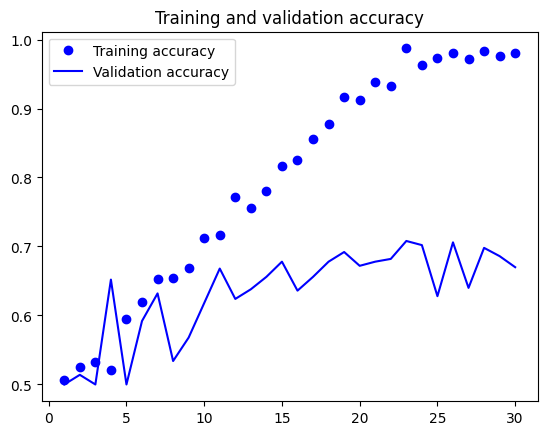

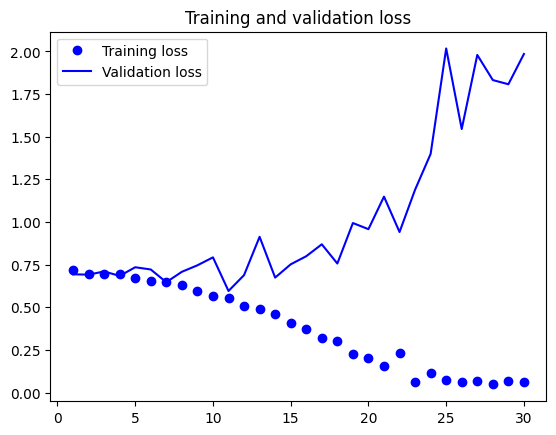

In [9]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [10]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6588 - loss: 0.6340
Test accuracy: 0.660
Test loss: 0.641


In [11]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6674 - loss: 0.6180
Validation accuracy: 0.668
Validation loss: 0.595


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [12]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

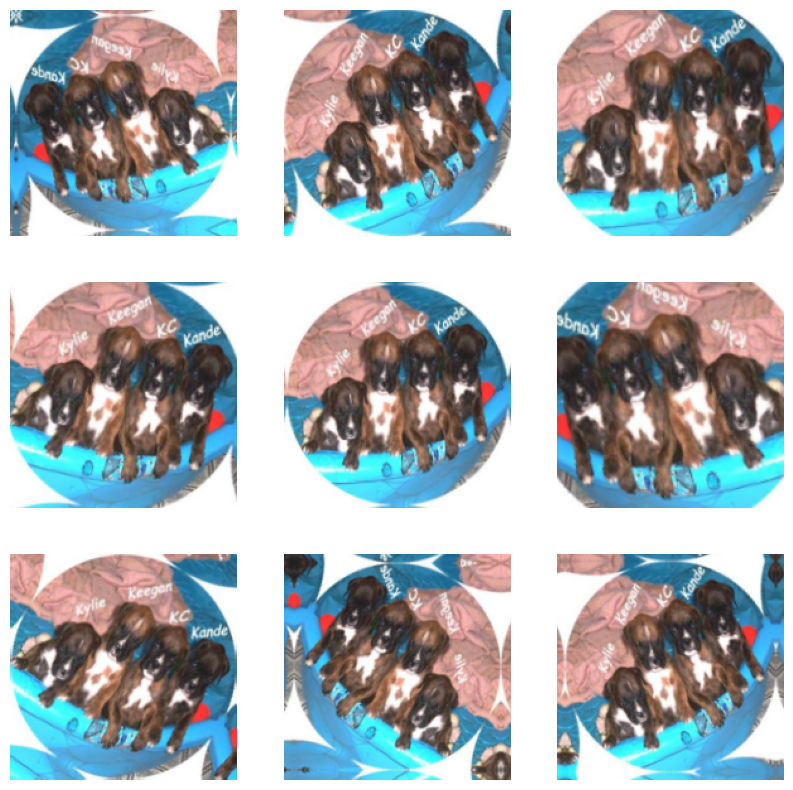

In [13]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [14]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5219 - loss: 0.7533 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.5003 - loss: 0.6924 - val_accuracy: 0.5040 - val_loss: 0.6901
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5098 - loss: 0.6915 - val_accuracy: 0.6320 - val_loss: 0.6873
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5700 - loss: 0.6920 - val_accuracy: 0.5020 - val_loss: 0.6904
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5515 - loss: 0.6918 - val_accuracy: 0.5600 - val_loss: 0.6801
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5746 - loss: 0.6779 - val_accuracy: 0.5020 - val_loss: 0.7529
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6361 - loss: 0.6540 - val_accuracy: 0.5820 - val_loss: 0.6624
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6326 - loss: 0.6589 - val_accuracy: 0.6240 - 

**Evaluating the model on the test set**

In [16]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7602 - loss: 0.4953
Test accuracy: 0.746
Test loss: 0.541


In [17]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7638 - loss: 0.5114
Validation accuracy: 0.778
Validation loss: 0.507


Question 2 :Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch).What performance did you achieve?

**Model 2**

In [18]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=750)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train2/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train2/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train2/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train2/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train2/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train2/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [20]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [21]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [22]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.5110 - loss: 0.7004 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5304 - loss: 0.6959 - val_accuracy: 0.5480 - val_loss: 0.6880
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5685 - loss: 0.6880 - val_accuracy: 0.5400 - val_loss: 0.6699
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6044 - loss: 0.6617 - val_accuracy: 0.6580 - val_loss: 0.6244
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6225 - loss: 0.6415 - val_accuracy: 0.6000 - val_loss: 0.7510
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.6744 - loss: 0.6228 - val_accuracy: 0.6580 - val_loss: 0.6205
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6914 - loss: 0.5729 - val_accuracy: 0.6960 - val_loss: 0.6175
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7259 - loss: 0.5309 - val_accuracy: 0.6580 -

**Displaying curves of loss and accuracy during training**

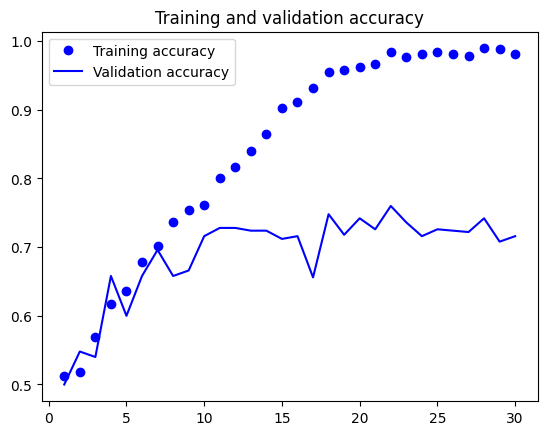

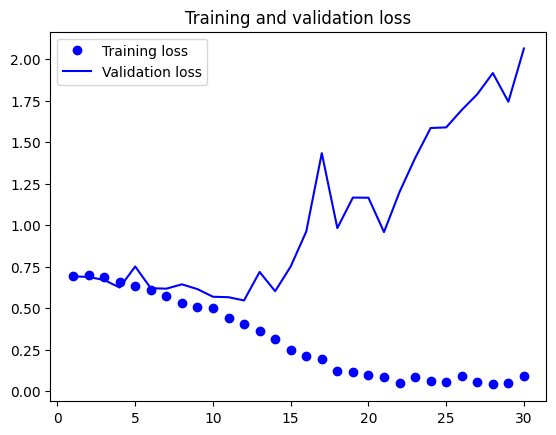

In [24]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [25]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.6718 - loss: 0.6444
Test accuracy: 0.674
Test loss: 0.633


In [26]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.7432 - loss: 0.5329
Validation accuracy: 0.728
Validation loss: 0.547


# Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

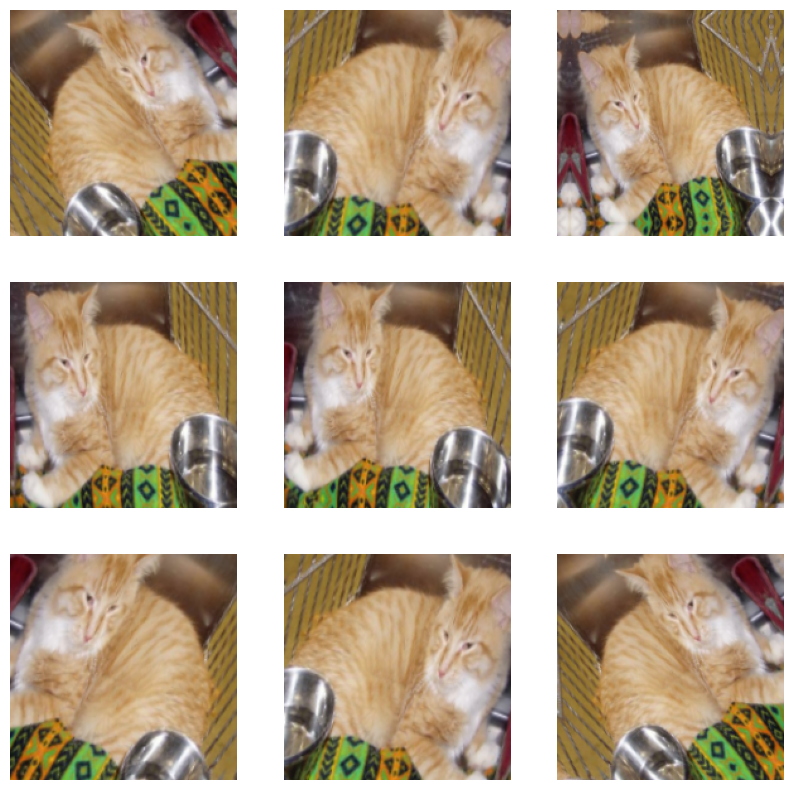

In [27]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [28]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [29]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.4981 - loss: 0.7142 - val_accuracy: 0.5000 - val_loss: 0.7328
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5378 - loss: 0.7437 - val_accuracy: 0.5840 - val_loss: 0.6903
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5124 - loss: 0.6932 - val_accuracy: 0.6220 - val_loss: 0.6825
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5686 - loss: 0.6834 - val_accuracy: 0.5300 - val_loss: 0.6818
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5737 - loss: 0.6794 - val_accuracy: 0.5960 - val_loss: 0.6661
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6216 - loss: 0.6538 - val_accuracy: 0.5180 - val_loss: 1.2213
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6381 - loss: 0.6333 - val_accuracy: 0.6340 - val_loss: 0.6459
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6408 - loss: 0.6271 - val_accuracy: 0.6280 - v

**Evaluating the model on the test set**

In [30]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7371 - loss: 0.5458
Test accuracy: 0.740
Test loss: 0.531


In [31]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7837 - loss: 0.4426
Validation accuracy: 0.784
Validation loss: 0.449


Question 3: Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

**Model 3**

Training has 2000 samples, test has 500 samples and validation has 500 samples.

In [32]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 3000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1200, end_index=1450)
make_subset("test", start_index=1700, end_index=1950)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train3/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train3/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train3/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train3/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train3/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train3/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [33]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [34]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [35]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [36]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [37]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.4762 - loss: 0.7127 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5015 - loss: 0.6932 - val_accuracy: 0.5060 - val_loss: 0.6907
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.5288 - loss: 0.6930 - val_accuracy: 0.6080 - val_loss: 0.6695
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6109 - loss: 0.6687 - val_accuracy: 0.6020 - val_loss: 0.6571
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6372 - loss: 0.6309 - val_accuracy: 0.6280 - val_loss: 0.6449
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.6777 - loss: 0.5982 - val_accuracy: 0.6440 - val_loss: 0.6052
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7326 - loss: 0.5205 - val_accuracy: 0.7000 - val_loss: 0.5739
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7513 - loss: 0.4948 - val_accuracy: 0.6680 -

**Displaying curves of loss and accuracy during training**

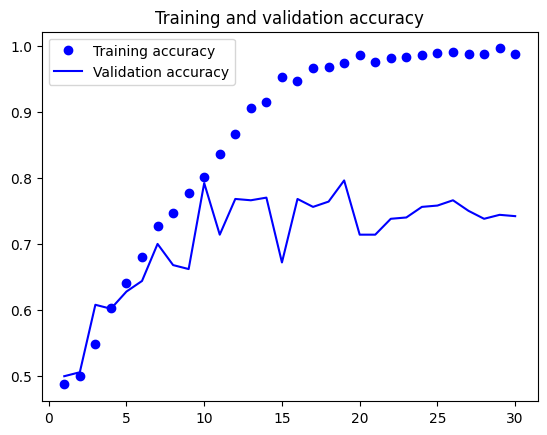

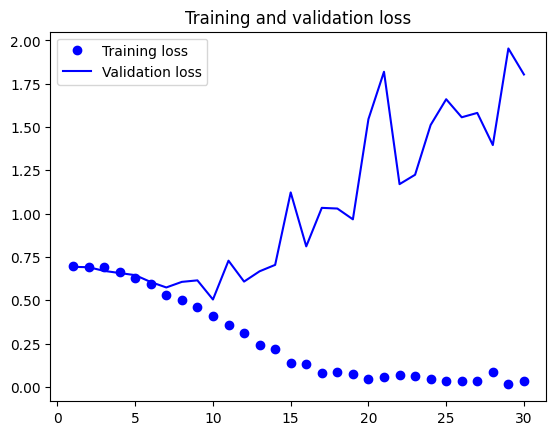

In [38]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**



In [39]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.7585 - loss: 0.5107
Test accuracy: 0.752
Test loss: 0.529


In [40]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8111 - loss: 0.4614
Validation accuracy: 0.792
Validation loss: 0.504


#Using data augmentation

**Define a data augmentation stage to add to an image model**

In [41]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

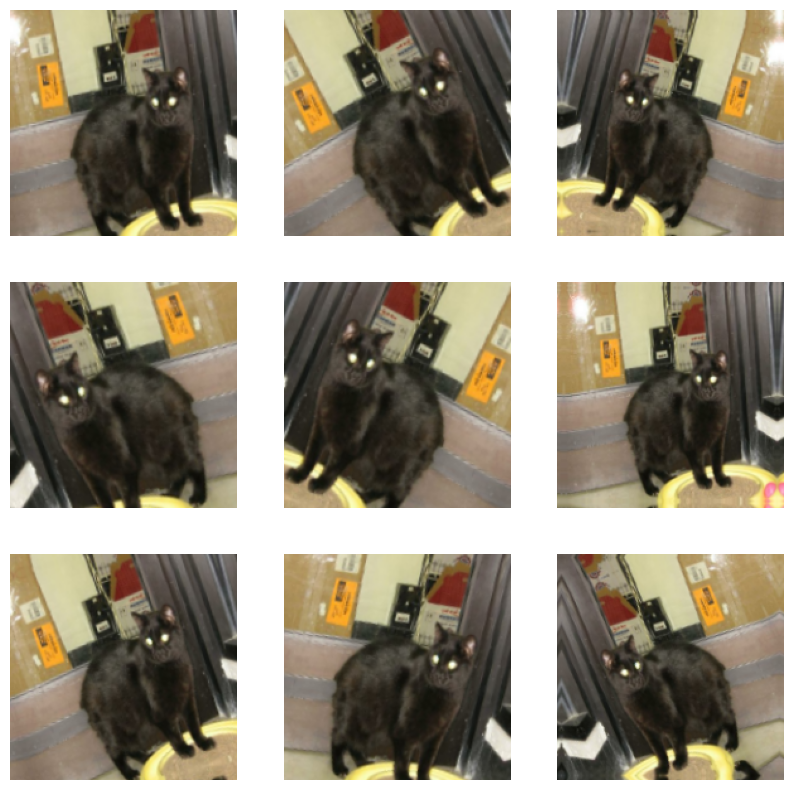

In [42]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [43]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [44]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.5105 - loss: 0.7964 - val_accuracy: 0.5160 - val_loss: 0.6926
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5043 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5312 - loss: 0.6973 - val_accuracy: 0.5360 - val_loss: 0.6888
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.5206 - loss: 0.6901 - val_accuracy: 0.5020 - val_loss: 0.6929
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5460 - loss: 0.6897 - val_accuracy: 0.5980 - val_loss: 0.6692
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5950 - loss: 0.6748 - val_accuracy: 0.5500 - val_loss: 0.7054
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6178 - loss: 0.6594 - val_accuracy: 0.5760 - val_loss: 0.7098
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.6492 - loss: 0.6282 - val_accuracy: 0.6180 - v

**Evaluating the model on the test set**

In [45]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7973 - loss: 0.4539
Test accuracy: 0.798
Test loss: 0.428


In [46]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8191 - loss: 0.4270
Validation accuracy: 0.798
Validation loss: 0.455


**Model 4**

In [47]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train4")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 2500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=400)
make_subset("validation", start_index=1250, end_index=1500)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train4/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train4/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train4/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train4/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train4/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train4/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [48]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [49]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 800 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [50]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [51]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [52]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.5411 - loss: 0.7756 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.5148 - loss: 0.6996 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4794 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.5497 - loss: 0.7136 - val_accuracy: 0.5920 - val_loss: 0.6922
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5736 - loss: 0.7243 - val_accuracy: 0.6040 - val_loss: 0.6801
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5973 - loss: 0.7193 - val_accuracy: 0.5240 - val_loss: 0.6860
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4982 - loss: 0.6983 - val_accuracy: 0.5060 - val_loss: 0.7090
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.4829 - loss: 0.7048 - val_accuracy: 0.5080 -

**Displaying curves of loss and accuracy during training**

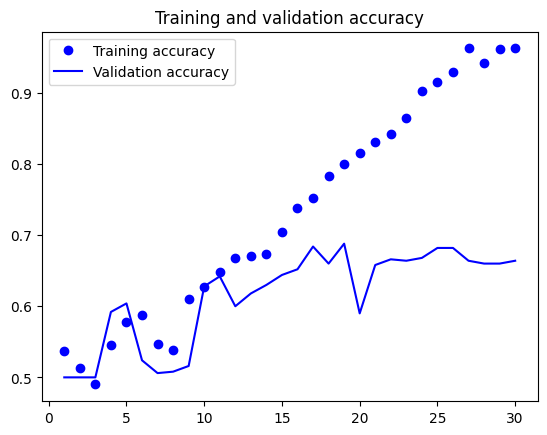

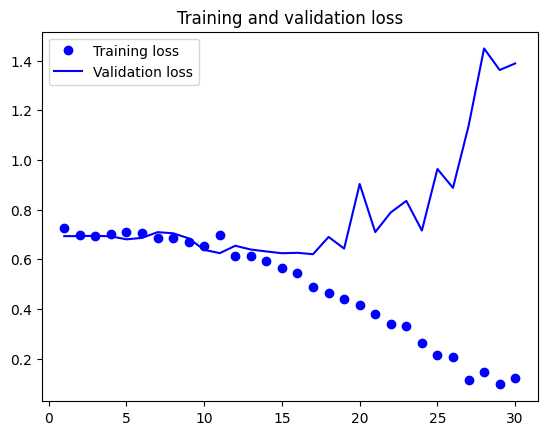

In [53]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [54]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6366 - loss: 0.6352
Test accuracy: 0.630
Test loss: 0.667


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6275 - loss: 0.6302
Validation accuracy: 0.624
Validation loss: 0.637


#Using data augmentation

**Define a data augmentation stage to add to an image model**



In [55]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

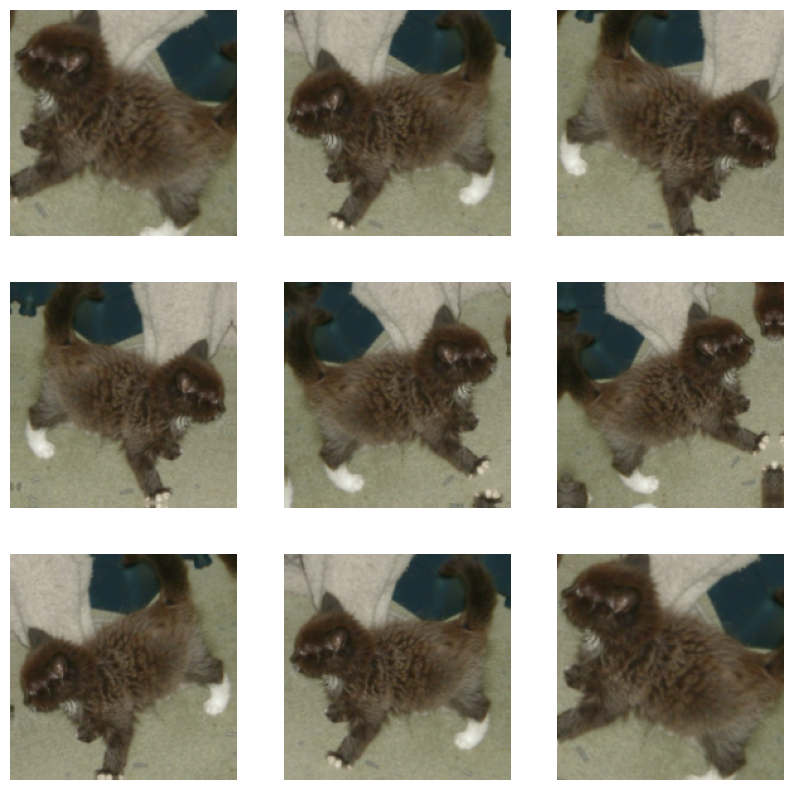

In [56]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [57]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**



In [58]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.4906 - loss: 0.7969 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.5170 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.4835 - loss: 0.7141 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5070 - loss: 0.6951 - val_accuracy: 0.5060 - val_loss: 0.6920
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5131 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6967
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5382 - loss: 0.6912 - val_accuracy: 0.5440 - val_loss: 0.6851
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5402 - loss: 0.6984 - val_accuracy: 0.6240 - val_loss: 0.6791
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5776 - loss: 0.6929 - val_accuracy: 0.4980 - v

**Evaluating the model on the test set**

In [59]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7306 - loss: 0.6215
Test accuracy: 0.734
Test loss: 0.606


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7984 - loss: 0.4425
Validation accuracy: 0.788
Validation loss: 0.455


**Model 5**

In [60]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train5")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=200)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train5/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train5/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train5/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train5/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train5/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train5/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [62]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [61]:
model.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_7 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

**Using image_dataset_from_directory to read images**



In [63]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 400 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [64]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [65]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [66]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - accuracy: 0.4539 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.7000
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.4838 - loss: 0.6986 - val_accuracy: 0.5240 - val_loss: 0.6928
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5292 - loss: 0.6975 - val_accuracy: 0.5040 - val_loss: 0.6927
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5553 - loss: 0.6965 - val_accuracy: 0.5100 - val_loss: 0.6924
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5077 - loss: 0.6933 - val_accuracy: 0.5640 - val_loss: 0.6910
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5765 - loss: 0.6882 - val_accuracy: 0.5000 - val_loss: 0.7694
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5177 - loss: 0.7413 - val_accuracy: 0.5780 - val_loss: 0.6874
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5586 - loss: 0.6874 - val_accuracy: 0.5020 -

**Displaying curves of loss and accuracy during training**

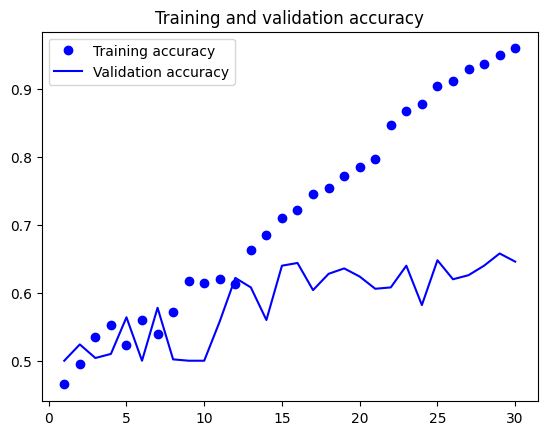

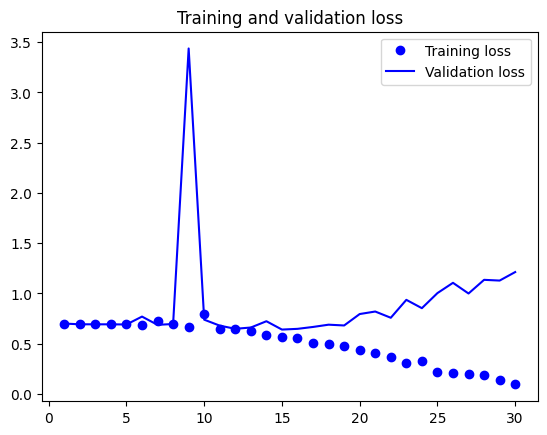

In [67]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [68]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6360 - loss: 0.6627
Test accuracy: 0.622
Test loss: 0.684


In [69]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6135 - loss: 0.6596
Validation accuracy: 0.640
Validation loss: 0.640


#Using data augmentation

**Define a data augmentation stage to add to an image model**

In [70]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

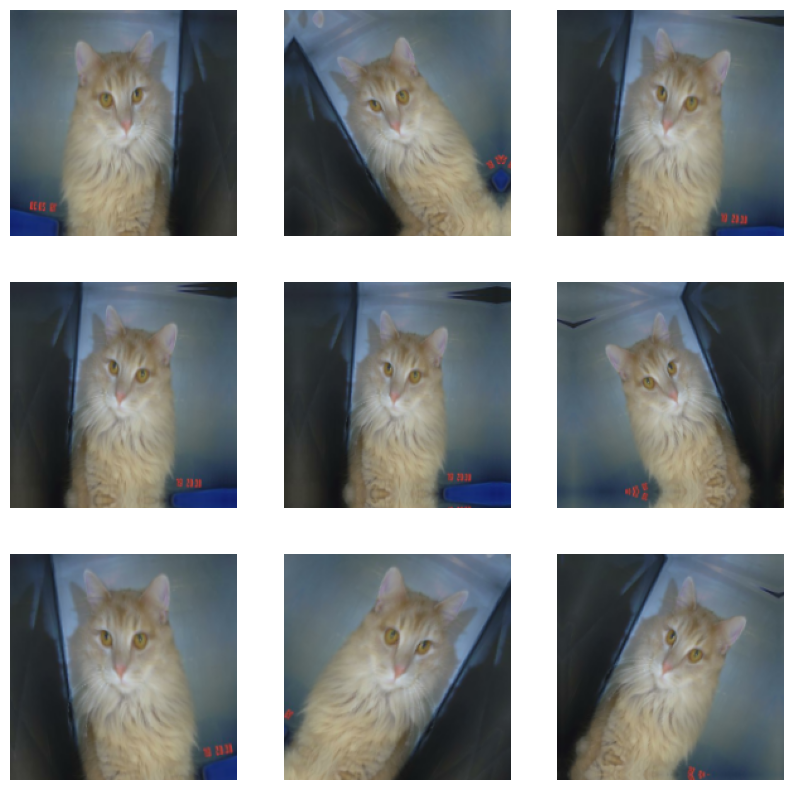

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [71]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [72]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.4511 - loss: 0.7767 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4867 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4939 - loss: 0.6973 - val_accuracy: 0.5720 - val_loss: 0.6930
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5128 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.5301 - loss: 0.6925 - val_accuracy: 0.5260 - val_loss: 0.6927
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.5424 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.5111 - loss: 0.6941 - val_accuracy: 0.5840 - val_loss: 0.6909
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5927 - loss: 0.6913 - val_accuracy: 0.5020 

**Evaluating the model on the test set**

In [73]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6266 - loss: 0.6471
Test accuracy: 0.636
Test loss: 0.638


In [74]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6550 - loss: 0.6136
Validation accuracy: 0.678
Validation loss: 0.602


Question 4: Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

## Leveraging a pretrained model

**Model 6**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train1/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train1/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train1/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train1/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train1/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train1/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [75]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Printing the list of trainable weights before and after freezing**

In [76]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [77]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [78]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [79]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 664ms/step - accuracy: 0.6597 - loss: 138.8554 - val_accuracy: 0.9660 - val_loss: 2.7228
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.9702 - loss: 3.0261 - val_accuracy: 0.9700 - val_loss: 4.1156
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.9444 - loss: 4.3026 - val_accuracy: 0.9680 - val_loss: 5.5930
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - accuracy: 0.9614 - loss: 7.2928 - val_accuracy: 0.9780 - val_loss: 2.2374
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.9567 - loss: 4.0387 - val_accuracy: 0.9820 - val_loss: 2.4181
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.9763 - loss: 1.1272 - val_accuracy: 0.9760 - val_loss: 4.2376
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 304ms/step - accuracy: 0.9758 - loss: 1.4059 - val_accuracy: 0.9660 - val_loss: 7.7858
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.9560 - loss: 3.3171 - val_accuracy

**Evaluating the model on the test set**

In [80]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9670 - loss: 5.4195
Test accuracy: 0.962
Test loss: 6.529


In [81]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9779 - loss: 2.8090
Validation accuracy: 0.978
Validation loss: 2.237


**Model 7**

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [82]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [83]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=750)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train2/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train2/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train2/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train2/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train2/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train2/test/dogs


In [85]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [86]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [87]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [88]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [89]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [90]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.8176 - loss: 27.4709 - val_accuracy: 0.9680 - val_loss: 3.1576
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.9380 - loss: 5.9168 - val_accuracy: 0.9580 - val_loss: 5.6538
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.9455 - loss: 5.1515 - val_accuracy: 0.9720 - val_loss: 3.3384
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.9558 - loss: 5.2268 - val_accuracy: 0.9780 - val_loss: 4.0268
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.9678 - loss: 4.1965 - val_accuracy: 0.9660 - val_loss: 4.0155
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.9583 - loss: 4.3663 - val_accuracy: 0.9780 - val_loss: 4.1450
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9636 - loss: 3.2935 - val_accuracy: 0.9760 - val_loss: 3.0841
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.9687 - loss: 2.5703 - val_accuracy

**Evaluating the model on the test set**

In [91]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9685 - loss: 6.8549
Test accuracy: 0.972
Test loss: 5.099


In [92]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9859 - loss: 1.7397
Validation accuracy: 0.984
Validation loss: 2.035


**Model 8**

Training – 2000
Validation – 500
Test- 500


**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [93]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [94]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 3000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1200, end_index=1450)
make_subset("test", start_index=1700, end_index=1950)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train3/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train3/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train3/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train3/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train3/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train3/test/dogs


In [105]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [106]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [107]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [108]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**



In [109]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [110]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.8285 - loss: 40.1536 - val_accuracy: 0.9760 - val_loss: 3.2452
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9352 - loss: 8.2885 - val_accuracy: 0.9520 - val_loss: 8.7343
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9620 - loss: 4.5108 - val_accuracy: 0.9640 - val_loss: 3.6396
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.9549 - loss: 5.7713 - val_accuracy: 0.9700 - val_loss: 4.9542
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9693 - loss: 3.1096 - val_accuracy: 0.9780 - val_loss: 3.6766
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.9683 - loss: 3.0321 - val_accuracy: 0.9740 - val_loss: 3.3549
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.9774 - loss: 2.7202 - val_accuracy: 0.9700 - val_loss: 5.8414
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.9753 - loss: 2.3460 - val_accurac

**Evaluating the model on the test set**

In [111]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9821 - loss: 1.8982
Test accuracy: 0.974
Test loss: 2.479


In [112]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9802 - loss: 1.6665
Validation accuracy: 0.978
Validation loss: 1.840


**Model 9** - Training – 800
Validation – 500
Test- 500


**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [96]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [97]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train4")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category
        dst_dir = new_base_dir / subset_name / category

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

make_subset("train", start_index=0, end_index=400)
make_subset("validation", start_index=1250, end_index=1500)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train4/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train4/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train4/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train4/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train4/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train4/test/dogs


In [99]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 800 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [100]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [101]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [102]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8419 - loss: 43.5065 - val_accuracy: 0.9200 - val_loss: 14.9086
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9514 - loss: 4.4717 - val_accuracy: 0.9760 - val_loss: 2.8337
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9662 - loss: 4.1001 - val_accuracy: 0.9520 - val_loss: 6.1717
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9643 - loss: 3.3678 - val_accuracy: 0.9760 - val_loss: 2.1064
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9699 - loss: 3.5635 - val_accuracy: 0.9720 - val_loss: 4.3361
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9633 - loss: 4.4406 - val_accuracy: 0.9820 - val_loss: 2.1830
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9764 - loss: 2.5188 - val_accuracy: 0.9780 - val_loss: 2.1939
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9626 - loss: 3.7992 - val_accuracy: 0.9740 -

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9780 - loss: 4.3722
Test accuracy: 0.972
Test loss: 3.671


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9790 - loss: 1.7854
Validation accuracy: 0.982
Validation loss: 1.806


**Model 10**- Training – 400
Validation – 500
Test- 500


**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_61 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train5")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=200)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train5/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train5/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train5/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train5/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train5/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train5/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 600 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


#Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6836 - loss: 92.4067 - val_accuracy: 0.9640 - val_loss: 3.5209
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9618 - loss: 3.6734 - val_accuracy: 0.9800 - val_loss: 2.1756
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9631 - loss: 4.1346 - val_accuracy: 0.9100 - val_loss: 13.9317
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9280 - loss: 8.8680 - val_accuracy: 0.9680 - val_loss: 3.9607
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9812 - loss: 1.2568 - val_accuracy: 0.9620 - val_loss: 3.7449
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9792 - loss: 1.7314 - val_accuracy: 0.9700 - val_loss: 4.3255
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9667 - loss: 2.5103 - val_accuracy: 0.9580 - val_loss: 11.8559
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9825 - loss: 4.5172 - val_accuracy: 0.9780 

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9710 - loss: 3.4185
Test accuracy: 0.958
Test loss: 5.620


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9868 - loss: 1.3776
Validation accuracy: 0.980
Validation loss: 2.176
